In [1]:
# In this step, we keep the original dataset (crop_yield_dataset.csv) 
# as a single source that includes both weather and soil attributes. 
# Instead of splitting into two separate files, we organize features 
# into logical groups within the same dataset:
#   - Weather-related features: Temperature, Humidity, Wind_Speed, Rainfall, etc.
#   - Soil-related features: Soil_pH, N, P, K, Soil_Type, Soil_Quality, etc.
#   - Target variable: Crop_Yield
#
# Benefits of this approach:
#   - Maintain data integrity without file fragmentation
#   - Easier to run combined analyses using both feature groups
#   - Flexible: we can still filter/select subsets of features 
#     (weather-only, soil-only, or combined) when modeling


In [2]:
# Import necessary libraries for data analysis and visualization
# pandas: Data manipulation and analysis library with DataFrame and Series structures
# numpy: Core library for numerical computing, arrays, and mathematical functions
# matplotlib.pyplot: Library for creating static, animated, and interactive plots
# seaborn: High-level interface for attractive statistical data visualization
# scipy.stats: Module for probability distributions and statistical functions/tests

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [4]:
# read cvs file
df = pd.read_csv('../dataset/raw/crop_yield_dataset.csv')

# Display the first 5 rows
df.head()

,Date,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
0,2014-01-01,Wheat,Peaty,5.50,9.440599,80.000000,10.956707,60.5,45.0,31.5,0.000000,22.833333
1,2014-01-01,Corn,Loamy,6.50,20.052576,79.947424,8.591577,84.0,66.0,50.0,104.871310,66.666667
2,2014-01-01,Rice,Peaty,5.50,12.143099,80.000000,7.227751,71.5,54.0,38.5,0.000000,27.333333
3,2014-01-01,Barley,Sandy,6.75,19.751848,80.000000,2.682683,50.0,40.0,30.0,58.939796,35.000000
4,2014-01-01,Soybean,Peaty,5.50,16.110395,80.000000,7.696070,49.5,45.0,38.5,32.970413,22.166667


In [5]:
# Returns the number of rows and columns in the DataFrame.
df.shape

(36520, 12)

In [6]:
# Returns information about the DataFarme, including data tyes and non-null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36520 entries, 0 to 36519
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          36520 non-null  object 
 1   Crop_Type     36520 non-null  object 
 2   Soil_Type     36520 non-null  object 
 3   Soil_pH       36520 non-null  float64
 4   Temperature   36520 non-null  float64
 5   Humidity      36520 non-null  float64
 6   Wind_Speed    36520 non-null  float64
 7   N             36520 non-null  float64
 8   P             36520 non-null  float64
 9   K             36520 non-null  float64
 10  Crop_Yield    36520 non-null  float64
 11  Soil_Quality  36520 non-null  float64
dtypes: float64(9), object(3)
memory usage: 3.3+ MB


In [7]:
# Returns summary statistics for numberical columns in the DataFrame.
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Soil_pH,36520.0,6.602731,0.816973,5.500000,6.250000,6.500000,6.750000,8.000000
Temperature,36520.0,23.813996,8.920519,-3.540176,17.168542,22.902987,30.254748,54.148911
Humidity,36520.0,74.256624,6.767587,45.851089,69.745252,77.097013,80.000000,80.000000
Wind_Speed,36520.0,10.020153,2.998310,-3.388906,7.985872,10.000299,12.038546,22.606078
N,36520.0,66.011035,10.886721,45.000000,58.500000,65.000000,71.500000,91.000000
P,36520.0,53.014006,8.812884,36.000000,45.000000,54.000000,60.000000,72.000000
K,36520.0,42.018250,8.537810,27.000000,35.000000,42.000000,49.500000,60.000000
Crop_Yield,36520.0,26.878480,25.740936,0.000000,0.000000,23.366344,46.415729,136.711982
Soil_Quality,36520.0,37.516632,17.703171,13.291667,22.500000,35.583333,49.291667,74.333333


In [8]:
# List of dataset columns with explanations
df.columns

Index(['Date', 'Crop_Type', 'Soil_Type', 'Soil_pH', 'Temperature', 'Humidity',
       'Wind_Speed', 'N', 'P', 'K', 'Crop_Yield', 'Soil_Quality'],
      dtype='object')

In [9]:
# Check for duplicates in each column and print the count of duplicates for each column.
for col in df.columns:
    duplicated_count = df[col].duplicated().sum()
    print(f"Column: {col}")
    print(f"Duplicate Count: {duplicated_count}")
    print("*" * 50)


Column: Date
Duplicate Count: 32868
**************************************************
Column: Crop_Type
Duplicate Count: 36510
**************************************************
Column: Soil_Type
Duplicate Count: 36515
**************************************************
Column: Soil_pH
Duplicate Count: 36515
**************************************************
Column: Temperature
Duplicate Count: 0
**************************************************
Column: Humidity
Duplicate Count: 13614
**************************************************
Column: Wind_Speed
Duplicate Count: 0
**************************************************
Column: N
Duplicate Count: 36500
**************************************************
Column: P
Duplicate Count: 36504
**************************************************
Column: K
Duplicate Count: 36502
**************************************************
Column: Crop_Yield
Duplicate Count: 11024
**************************************************
Column: Soil_Quality
Dup

In [10]:
# Duplicate records by multiple columns
duplicate_multi_cols = df[df.duplicated(
    subset=['Crop_Type', 'Soil_Type', 'Soil_pH','N', 'P', 'K', 'Crop_Yield', 'Soil_Quality'],
    keep=False
    )]
duplicate_multi_cols.shape

(11025, 12)

In [11]:
# Duplicate records by multiple columns
duplicate_multi_cols = df[df.duplicated(
    subset=['Crop_Type', 'Temperature', 'Humidity','Wind_Speed','Crop_Yield'],
    keep=False
    )]
duplicate_multi_cols.shape

(0, 12)

In [12]:
# Duplicate records by multiple columns
duplicate_multi_cols = df[df.duplicated(
    subset=['Crop_Type', 'Soil_Type', 'Soil_pH', 'Temperature', 'Humidity',
       'Wind_Speed', 'N', 'P', 'K', 'Crop_Yield', 'Soil_Quality'],
    keep=False
    )]
duplicate_multi_cols.shape

(0, 12)

In [13]:
# Columns where all values are the same (constant features).
constant_features = [col for col in df.columns if df[col].nunique() == 1]
print("Constant features:", constant_features)

Constant features: []


In [14]:
df.head()

,Date,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
0,2014-01-01,Wheat,Peaty,5.50,9.440599,80.000000,10.956707,60.5,45.0,31.5,0.000000,22.833333
1,2014-01-01,Corn,Loamy,6.50,20.052576,79.947424,8.591577,84.0,66.0,50.0,104.871310,66.666667
2,2014-01-01,Rice,Peaty,5.50,12.143099,80.000000,7.227751,71.5,54.0,38.5,0.000000,27.333333
3,2014-01-01,Barley,Sandy,6.75,19.751848,80.000000,2.682683,50.0,40.0,30.0,58.939796,35.000000
4,2014-01-01,Soybean,Peaty,5.50,16.110395,80.000000,7.696070,49.5,45.0,38.5,32.970413,22.166667


In [15]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [16]:
# Extract year, month, and day into separate columns
# The 'Date' column is stored as a datetime object.
# By splitting it into Year, Month, and Day, we can perform
# time-based analysis (e.g., seasonal trends, monthly averages, yearly comparisons).
# This also makes it easier to group or filter the dataset by specific periods.

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
print(df)

            Date  Crop_Type Soil_Type  Soil_pH  Temperature   Humidity  \
0     2014-01-01      Wheat     Peaty     5.50     9.440599  80.000000   
1     2014-01-01       Corn     Loamy     6.50    20.052576  79.947424   
2     2014-01-01       Rice     Peaty     5.50    12.143099  80.000000   
3     2014-01-01     Barley     Sandy     6.75    19.751848  80.000000   
4     2014-01-01    Soybean     Peaty     5.50    16.110395  80.000000   
...          ...        ...       ...      ...          ...        ...   
36515 2023-12-31     Cotton      Clay     6.25    19.538555  80.000000   
36516 2023-12-31  Sugarcane     Peaty     5.50    21.068336  78.931664   
36517 2023-12-31     Tomato     Sandy     6.75     6.030148  80.000000   
36518 2023-12-31     Potato     Peaty     5.50    11.079561  80.000000   
36519 2023-12-31  Sunflower      Clay     6.25    11.455692  80.000000   

       Wind_Speed     N     P     K  Crop_Yield  Soil_Quality  Year  Month  \
0       10.956707  60.5  45.0  31

In [17]:
#  Rounding and converting continuous values to integers
# Step 1: Backup the original columns
# - Before modifying the values, keep a copy of the original data 
#   so you can compare or restore it later if needed.
# - The suffix "_orig" is used to indicate that these columns contain 
#   the original (continuous) values.
df['Temperature_orig']  = df['Temperature']
df['Humidity_orig']     = df['Humidity']
df['Wind_Speed_orig']   = df['Wind_Speed']
df['Soil_Quality_orig'] = df['Soil_Quality']

# Round and convert to integers
# - Round the values to the nearest integer using .round()
# - Convert them to integer type with .astype(int)
# - Benefits of integer conversion:
#    1) Removes decimals → simplifies the dataset
#    2) Makes grouping/aggregation easier (e.g., average yield by integer temperature)
#    3) Cleaner axis labels in visualizations (no long decimal numbers)
#    4) Easier interpretation for non-technical audiences
df['Temperature']  = df['Temperature'].round().astype(int)
df['Humidity']     = df['Humidity'].round().astype(int)
df['Wind_Speed']   = df['Wind_Speed'].round().astype(int)
df['Soil_Quality'] = df['Soil_Quality'].round().astype(int)

# Step 3: Verify the transformation
# - Print the first few rows of the DataFrame 
# - Ensure that:
#    - The new integer values replaced the original columns
#    - The "_orig" columns still keep the original decimal values
print(df.head())

        Date Crop_Type Soil_Type  Soil_pH  Temperature  Humidity  Wind_Speed  \
0 2014-01-01     Wheat     Peaty     5.50            9        80          11   
1 2014-01-01      Corn     Loamy     6.50           20        80           9   
2 2014-01-01      Rice     Peaty     5.50           12        80           7   
3 2014-01-01    Barley     Sandy     6.75           20        80           3   
4 2014-01-01   Soybean     Peaty     5.50           16        80           8   

      N     P     K  Crop_Yield  Soil_Quality  Year  Month  Day  \
0  60.5  45.0  31.5    0.000000            23  2014      1    1   
1  84.0  66.0  50.0  104.871310            67  2014      1    1   
2  71.5  54.0  38.5    0.000000            27  2014      1    1   
3  50.0  40.0  30.0   58.939796            35  2014      1    1   
4  49.5  45.0  38.5   32.970413            22  2014      1    1   

   Temperature_orig  Humidity_orig  Wind_Speed_orig  Soil_Quality_orig  
0          9.440599      80.000000        1

In [18]:
# Identify numerical and categorical columns.
numerical_columns = df.select_dtypes(include=[np.number]).columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("Numerical columns:", numerical_columns)
print("Categorical columns:", categorical_columns)


Numerical columns: Index(['Soil_pH', 'Temperature', 'Humidity', 'Wind_Speed', 'N', 'P', 'K',
       'Crop_Yield', 'Soil_Quality', 'Year', 'Month', 'Day',
       'Temperature_orig', 'Humidity_orig', 'Wind_Speed_orig',
       'Soil_Quality_orig'],
      dtype='object')
Categorical columns: Index(['Crop_Type', 'Soil_Type'], dtype='object')


In [19]:
# Get the list of columns with missing values only for numerical columns.
missing_numerical_columns = df[numerical_columns].isnull().any()
missing_numerical_columns = missing_numerical_columns[missing_numerical_columns].index
print("Numerical columns with missing values:", missing_numerical_columns.tolist())


Numerical columns with missing values: []


In [20]:
# Get the list of columns with missing values only for categorical columns.
missing_categorical_columns = df[categorical_columns].isnull().any()
missing_categorical_columns = missing_categorical_columns[missing_categorical_columns].index
print("Categorical columns with missing values:", missing_categorical_columns.tolist())


Categorical columns with missing values: []


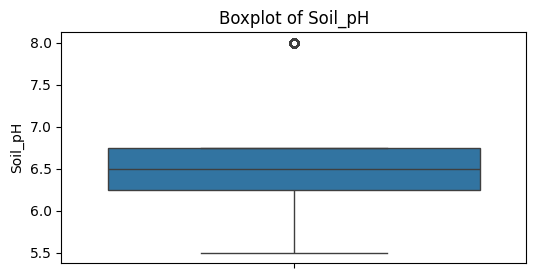

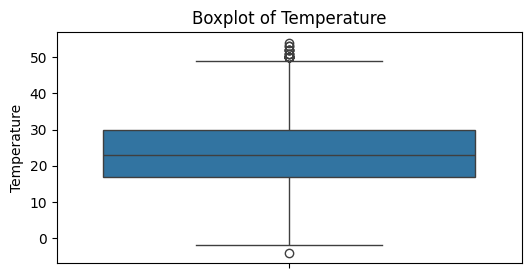

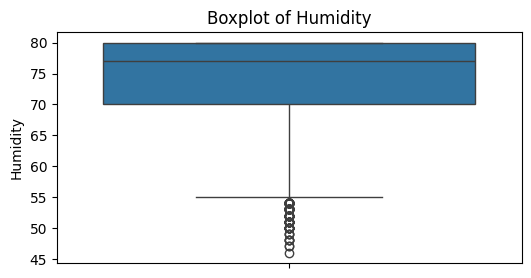

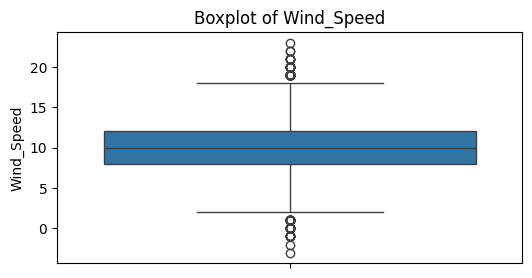

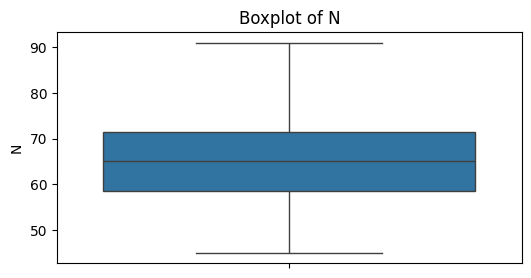

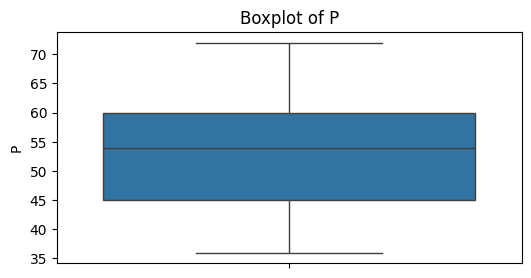

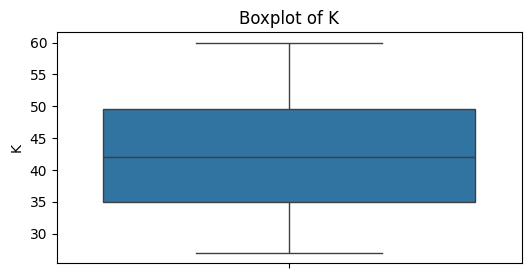

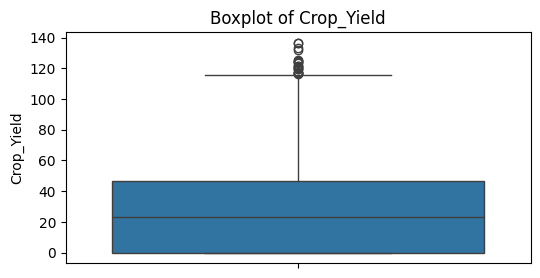

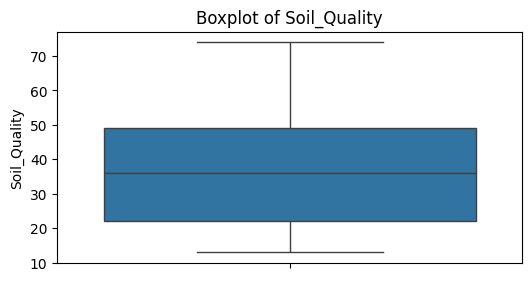

In [21]:
# Outlier Detection using Boxplots
# Here we generate boxplots for each numerical column to visually inspect 
# the distribution and potential outliers. 
# 
# Columns being checked:
#   - Soil_pH       : Soil acidity/alkalinity level
#   - Temperature   : Air temperature (°C)
#   - Humidity      : Relative humidity (%)
#   - Wind_Speed    : Wind speed (m/s)
#   - N, P, K       : Major soil nutrients (Nitrogen, Phosphorus, Potassium)
#   - Crop_Yield    : Crop production amount (target variable)
#   - Soil_Quality  : Soil fertility/quality index
#
# This step is important before modeling to decide:
#   - Whether to keep or remove outliers
#   - Whether transformations (log, winsorizing, binning) are needed
#   - How stable each feature distribution is

# Define the list of numeric columns to check
num_cols = ['Soil_pH','Temperature','Humidity','Wind_Speed',
            'N','P','K','Crop_Yield','Soil_Quality']

# Generate a boxplot for each column
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [24]:
# Outlier Detection using IQR 

def detect_outliers_iqr(data, column):

    Q1 = data[column].quantile(0.25)   # 1st Quartile (Q1, 25%)
    Q3 = data[column].quantile(0.75)   # 3rd Quartile (Q3, 75%)
    IQR = Q3 - Q1                      # Interquartile Range (IQR)

    lower_bound = Q1 - 1.5 * IQR       # Lower threshold 
    upper_bound = Q3 + 1.5 * IQR       # Upper threshold 

    # Find outliers 
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    
    print(f"Column: {column}")
    print(f" - Q1 (25%): {Q1}")
    print(f" - Q3 (75%): {Q3}")
    print(f" - IQR: {IQR}")
    print(f" - Lower Bound: {lower_bound}")
    print(f" - Upper Bound: {upper_bound}")
    print(f" - Outlier count: {len(outliers)}\n")

    return outliers

# Apply the function to Temperature and Crop_Yield
outliers_yield = detect_outliers_iqr(df, 'Crop_Yield')             # Outlier count: 20
outliers_Temperature = detect_outliers_iqr(df, 'Temperature')      # Outlier count: 23
outliers_Humidity = detect_outliers_iqr(df, 'Humidity')            # Outlier count: 170
outliers_Wind_Speed = detect_outliers_iqr(df, 'Wind_Speed')        # Outlier count: 139
outliers_N = detect_outliers_iqr(df, 'N')                          # Outlier count: 0
outliers_P = detect_outliers_iqr(df, 'P')                          # Outlier count: 0
outliers_K = detect_outliers_iqr(df, 'K')                          # Outlier count: 0
outliers_Soil_Quality = detect_outliers_iqr(df, 'Soil_Quality')    # Outlier count: 0
outliers_Soil_pH = detect_outliers_iqr(df, 'Soil_pH')              # Outlier count: 7361

Column: Crop_Yield
 - Q1 (25%): 0.0
 - Q3 (75%): 46.41572902853015
 - IQR: 46.41572902853015
 - Lower Bound: -69.62359354279522
 - Upper Bound: 116.03932257132537
 - Outlier count: 20

Column: Temperature
 - Q1 (25%): 17.0
 - Q3 (75%): 30.0
 - IQR: 13.0
 - Lower Bound: -2.5
 - Upper Bound: 49.5
 - Outlier count: 23

Column: Humidity
 - Q1 (25%): 70.0
 - Q3 (75%): 80.0
 - IQR: 10.0
 - Lower Bound: 55.0
 - Upper Bound: 95.0
 - Outlier count: 170

Column: Wind_Speed
 - Q1 (25%): 8.0
 - Q3 (75%): 12.0
 - IQR: 4.0
 - Lower Bound: 2.0
 - Upper Bound: 18.0
 - Outlier count: 139

Column: N
 - Q1 (25%): 58.5
 - Q3 (75%): 71.5
 - IQR: 13.0
 - Lower Bound: 39.0
 - Upper Bound: 91.0
 - Outlier count: 0

Column: P
 - Q1 (25%): 45.0
 - Q3 (75%): 60.0
 - IQR: 15.0
 - Lower Bound: 22.5
 - Upper Bound: 82.5
 - Outlier count: 0

Column: K
 - Q1 (25%): 35.0
 - Q3 (75%): 49.50000000000001
 - IQR: 14.500000000000007
 - Lower Bound: 13.24999999999999
 - Upper Bound: 71.25000000000001
 - Outlier count: 0

Co

In [26]:
# Dictionary to store results
outlier_results = {
    "Crop_Yield": outliers_yield,
    "Temperature": outliers_Temperature,
    "Humidity": outliers_Humidity,
    "Wind_Speed": outliers_Wind_Speed,
    "N": outliers_N,
    "P": outliers_P,
    "K": outliers_K,
    "Soil_Quality": outliers_Soil_Quality,
    "Soil_pH": outliers_Soil_pH
}

# Print only columns where outliers exist
for col, outliers in outlier_results.items():
    if len(outliers) > 0:
        print(f"Column: {col} → Outliers detected: {len(outliers)}")
        display(outliers.head())  # Show first few outlier rows for inspection
        print("-"*60)

Column: Crop_Yield → Outliers detected: 20


,Date,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality,Year,Month,Day,Temperature_orig,Humidity_orig,Wind_Speed_orig,Soil_Quality_orig
282,2014-01-29,Rice,Loamy,6.5,26,74,9,91.0,72.0,55.0,123.867056,73,2014,1,29,25.578779,74.421221,9.384236,72.666667
1356,2014-05-16,Sugarcane,Loamy,6.5,25,75,9,91.0,72.0,60.0,131.959911,74,2014,5,16,24.744697,75.255303,9.259344,74.333333
3066,2014-11-03,Sugarcane,Loamy,6.5,25,75,14,91.0,72.0,60.0,125.681375,74,2014,11,3,25.222490,74.777510,13.609492,74.333333
4762,2015-04-22,Rice,Loamy,6.5,25,75,7,91.0,72.0,55.0,121.313305,73,2015,4,22,25.232082,74.767918,7.228245,72.666667
5142,2015-05-30,Rice,Loamy,6.5,26,74,9,91.0,72.0,55.0,121.692354,73,2015,5,30,26.128806,73.871194,8.637162,72.666667


------------------------------------------------------------
Column: Temperature → Outliers detected: 23


,Date,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality,Year,Month,Day,Temperature_orig,Humidity_orig,Wind_Speed_orig,Soil_Quality_orig
1981,2014-07-18,Corn,Clay,6.25,51,49,11,72.0,55.0,40.0,0.0,49,2014,7,18,50.588406,49.411594,11.461104,48.708333
5590,2015-07-14,Wheat,Saline,8.00,52,48,9,71.5,55.0,40.5,0.0,14,2015,7,14,52.040254,47.959746,9.073961,13.916667
5946,2015-08-18,Sugarcane,Sandy,6.75,53,47,14,65.0,48.0,36.0,0.0,43,2015,8,18,53.056750,46.943250,13.595721,43.458333
9317,2016-07-20,Tomato,Sandy,6.75,52,48,10,50.0,36.0,30.0,0.0,34,2016,7,20,51.676341,48.323659,9.725242,33.833333
9330,2016-07-22,Wheat,Loamy,6.50,50,50,11,77.0,60.0,45.0,0.0,61,2016,7,22,50.108923,49.891077,11.317809,60.666667


------------------------------------------------------------
Column: Humidity → Outliers detected: 170


,Date,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality,Year,Month,Day,Temperature_orig,Humidity_orig,Wind_Speed_orig,Soil_Quality_orig
1529,2014-06-02,Sunflower,Sandy,6.75,48,52,14,50.0,44.0,33.0,0.0,37,2014,6,2,48.026516,51.973484,14.353764,37.041667
1631,2014-06-13,Corn,Saline,8.00,46,54,5,78.0,60.5,45.0,0.0,15,2014,6,13,46.157495,53.842505,5.088158,15.291667
1665,2014-06-16,Cotton,Saline,8.00,47,53,5,71.5,60.5,54.0,0.0,16,2014,6,16,46.939839,53.060161,4.678903,15.500000
1678,2014-06-17,Potato,Loamy,6.50,47,53,7,77.0,60.0,45.0,0.0,61,2014,6,17,46.689139,53.310861,7.417730,60.666667
1680,2014-06-18,Wheat,Peaty,5.50,49,51,12,60.5,45.0,31.5,0.0,23,2014,6,18,48.542308,51.457692,12.423613,22.833333


------------------------------------------------------------
Column: Wind_Speed → Outliers detected: 139


,Date,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality,Year,Month,Day,Temperature_orig,Humidity_orig,Wind_Speed_orig,Soil_Quality_orig
170,2014-01-18,Wheat,Saline,8.00,10,80,19,71.5,55.0,40.5,0.000000,14,2014,1,18,9.906903,80.000000,18.928591,13.916667
296,2014-01-30,Sugarcane,Saline,8.00,19,80,1,84.5,66.0,54.0,30.789733,17,2014,1,30,18.858494,80.000000,1.454372,17.041667
539,2014-02-23,Sunflower,Clay,6.25,15,80,20,60.0,55.0,44.0,31.363877,46,2014,2,23,14.743031,80.000000,19.763942,46.375000
540,2014-02-24,Wheat,Loamy,6.50,4,80,19,77.0,60.0,45.0,0.000000,61,2014,2,24,4.321629,80.000000,19.413246,60.666667
1455,2014-05-26,Cotton,Sandy,6.75,27,73,19,55.0,44.0,36.0,22.723616,39,2014,5,26,26.875845,73.124155,18.522659,39.375000


------------------------------------------------------------
Column: Soil_pH → Outliers detected: 7361


,Date,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality,Year,Month,Day,Temperature_orig,Humidity_orig,Wind_Speed_orig,Soil_Quality_orig
6,2014-01-01,Sugarcane,Saline,8.0,14,80,10,84.5,66.0,54.0,0.000000,17,2014,1,1,13.533004,80.000000,9.910484,17.041667
13,2014-01-02,Barley,Saline,8.0,11,80,11,65.0,55.0,45.0,8.159006,14,2014,1,2,11.400779,80.000000,11.382449,13.750000
18,2014-01-02,Potato,Saline,8.0,19,80,14,71.5,55.0,40.5,52.589622,14,2014,1,2,19.062629,80.000000,14.068720,13.916667
19,2014-01-02,Sunflower,Saline,8.0,20,80,7,65.0,60.5,49.5,65.936595,15,2014,1,2,20.017664,79.982336,7.198711,14.583333
22,2014-01-03,Rice,Saline,8.0,12,80,6,84.5,66.0,49.5,0.000000,17,2014,1,3,12.327918,80.000000,5.514838,16.666667


------------------------------------------------------------


In [86]:
# Combine all outlier indices into one set
outlier_indices = set()

for col, outliers in outlier_results.items():
    if len(outliers) > 0:
        outlier_indices.update(outliers.index)

print(f"Total rows with outliers: {len(outlier_indices)}")

# Remove outlier rows from DataFrame
df_cleaned = df.drop(index=outlier_indices)

print("Original shape:", df.shape)
print("After outlier removal:", df_cleaned.shape)

Total rows with outliers: 7675
Original shape: (36500, 19)
After outlier removal: (28825, 19)


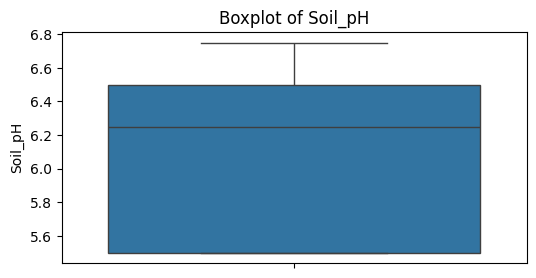

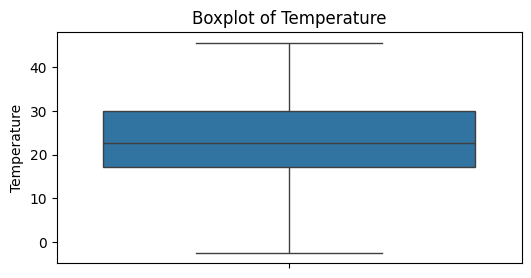

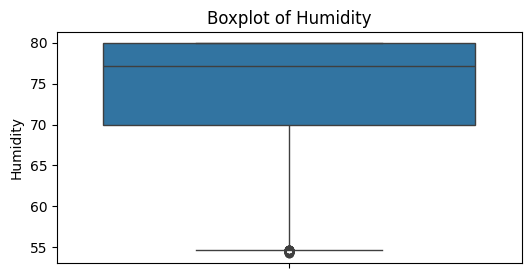

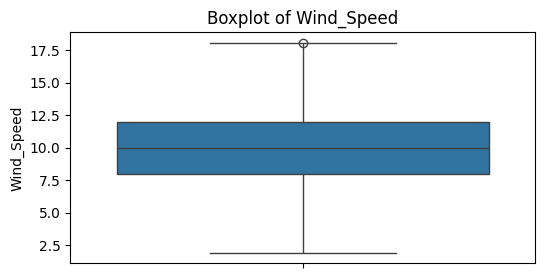

In [89]:
# Define the list of numeric columns to check
num_cols = ['Soil_pH','Temperature','Humidity','Wind_Speed']
            
# Generate a boxplot for each column
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(y=df_cleaned[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [90]:
# Save Cleaning data to a new CSV
df_cleaned.to_csv('../dataset/processed/crop_yield_cleansing_data.csv', index=False)
print("crop_yield_cleansing_data saved")
display(df_cleaned.head())

crop_yield_cleansing_data saved


,Date,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality,Year,Month,Day,Temperature_int,Humidity_int,Wind_Speed_int,Soil_Quality_int
0,2014-01-01,Wheat,Peaty,5.50,9.440599,80.000000,10.956707,60.5,45.0,31.5,0.000000,22.833333,2014,1,1,9,80,11,23
1,2014-01-01,Corn,Loamy,6.50,20.052576,79.947424,8.591577,84.0,66.0,50.0,104.871310,66.666667,2014,1,1,20,80,9,67
2,2014-01-01,Rice,Peaty,5.50,12.143099,80.000000,7.227751,71.5,54.0,38.5,0.000000,27.333333,2014,1,1,12,80,7,27
3,2014-01-01,Barley,Sandy,6.75,19.751848,80.000000,2.682683,50.0,40.0,30.0,58.939796,35.000000,2014,1,1,20,80,3,35
4,2014-01-01,Soybean,Peaty,5.50,16.110395,80.000000,7.696070,49.5,45.0,38.5,32.970413,22.166667,2014,1,1,16,80,8,22
